# Iris Species Classification
## Introduction
The goal of this project is to correctly classify iris species by using four measurements.
## Problem Statement
The data may have missing values, duplicates, outliers or other issues that need to be corrected before EDA and model building can occur.
## Input
iris.csv which can be found in the data directory.
## Output
iris_clean.csv which contains
1. No missing values
2. No zero values (since we are dealing with lengths and widths)
3. No duplicate rows
4. No outliers


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Read in the data

In [2]:
iris_df = pd.read_csv('data/iris.csv', skipinitialspace = True)
iris_df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Change the column names to make the dataframe easier to work with.

In [3]:
iris_df.columns = iris_df.columns.str.replace(' ', '_')
# class is a reserved word
iris_df.rename(columns = {'class':'species'}, inplace = True)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Check for missing data

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df[iris_df.isna().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,NaN,4.8,1.8,Iris-versicolor
103,6.3,2.9,NaN,1.8,Iris-virginica
128,6.4,2.8,5.6,NaN,Iris-virginica


## Check the mean and median
Since the medians for petal length and width are somewhat different from the mean the data may have outliers so we will use the median to fill in the missing values.

In [6]:
print(f'sepal width mean = {iris_df.sepal_width.mean()} mediam = {iris_df.sepal_width.median()}')
print(f'petal length mean = {iris_df.petal_length.mean()} mediam = {iris_df.petal_length.median()}')
print(f'petal width mean = {iris_df.petal_width.mean()} mediam = {iris_df.petal_width.median()}')

sepal width mean = 3.0530201342281877 mediam = 3.0
petal length mean = 3.746308724832214 mediam = 4.3
petal width mean = 1.1765100671140942 mediam = 1.3


In [7]:
iris_df.sepal_width = iris_df.sepal_width.fillna(iris_df.sepal_width.median())
iris_df.petal_length = iris_df.petal_length.fillna(iris_df.petal_length.median())
iris_df.petal_width = iris_df.petal_width.fillna(iris_df.petal_width.median())
iris_df[iris_df.isna().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Check for zero values
petal width has zero values so replace them with the median

In [9]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.052667,3.750000,1.177333
std,0.828066,0.433450,1.758498,0.773742
min,4.300000,2.000000,1.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df.petal_width.replace(0, iris_df.petal_width.median(), inplace=True)
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.052667,3.750000,1.212000
std,0.828066,0.433450,1.758498,0.748773
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Remove duplicates

In [11]:
iris_df[iris_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
37,4.9,3.1,1.5,1.3,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
iris_df.drop_duplicates(inplace = True, ignore_index = True)
iris_df[iris_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


## Remove Outliers
There are many different ways to remove outliers and this is just one approach.  If the EDA doesn't look correct or the model predictions are not good we can come back and try different methods to remove the outliers.

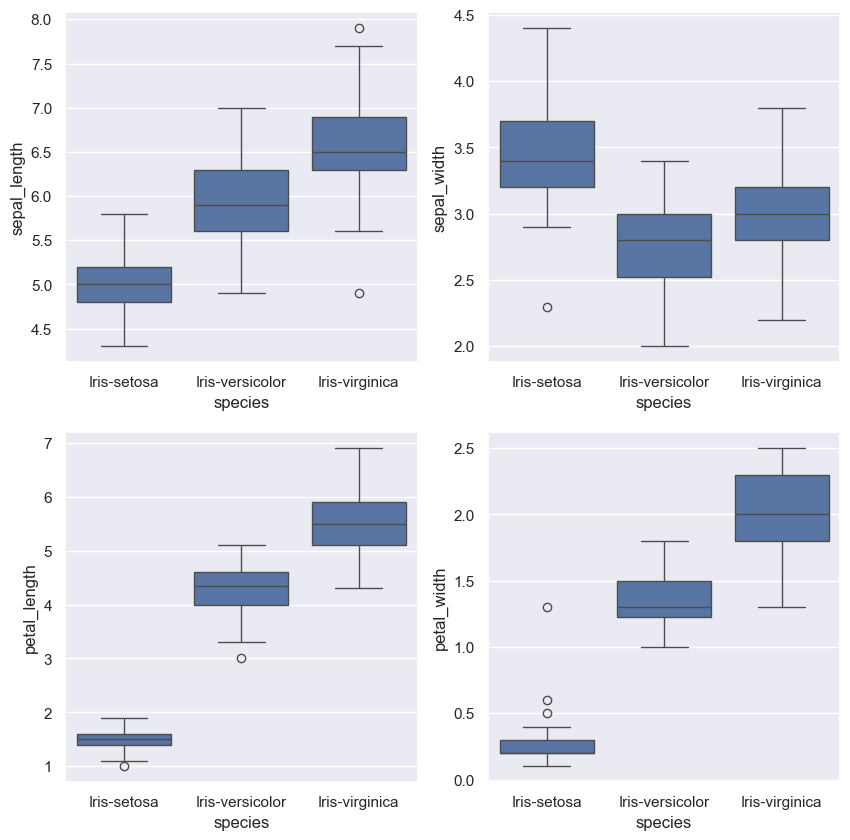

In [13]:
sns.set(rc={"figure.figsize":(10, 10)});
fig, axes = plt.subplots(2, 2);
sns.boxplot(data=iris_df, x='species', y='sepal_length', ax=axes[0,0]);
sns.boxplot(data=iris_df, x='species', y='sepal_width', ax=axes[0,1]);
sns.boxplot(data=iris_df, x='species', y='petal_length', ax=axes[1,0]);
sns.boxplot(data=iris_df, x='species', y='petal_width', ax=axes[1,1]);

In [14]:
def bounds(df, species, feature):
    Q3 = np.quantile(df[df.species == species][feature], 0.75)
    Q1 = np.quantile(df[df.species == species][feature], 0.25)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound
    

In [15]:
species = 'Iris-virginica'
feature = 'sepal_length'
lower_bound, upper_bound = bounds(iris_df, species, feature)
iris_df.loc[iris_df[(iris_df.species == species) & (iris_df[feature] <= lower_bound)].index, feature] = lower_bound
iris_df.loc[iris_df[(iris_df.species == species) & (iris_df[feature] >= upper_bound)].index, feature] = upper_bound

In [16]:
species = 'Iris-setosa'
feature = 'sepal_width'
lower_bound, upper_bound = bounds(iris_df, species, feature)
iris_df.loc[iris_df[(iris_df.species == species) & (iris_df[feature] <= lower_bound)].index, feature] = lower_bound

feature = 'petal_length'
lower_bound, upper_bound = bounds(iris_df, species, feature)
iris_df.loc[iris_df[(iris_df.species == species) & (iris_df[feature] <= lower_bound)].index, feature] = lower_bound

feature = 'petal_width'
lower_bound, upper_bound = bounds(iris_df, species, feature)
iris_df.loc[iris_df[(iris_df.species == species) & (iris_df[feature] >= upper_bound)].index, feature] = upper_bound

In [17]:
species = 'Iris-versicolor'
feature = 'petal_length'
lower_bound, upper_bound = bounds(iris_df, species, feature)
iris_df.loc[iris_df[(iris_df.species == species) & (iris_df[feature] <= lower_bound)].index, feature] = lower_bound

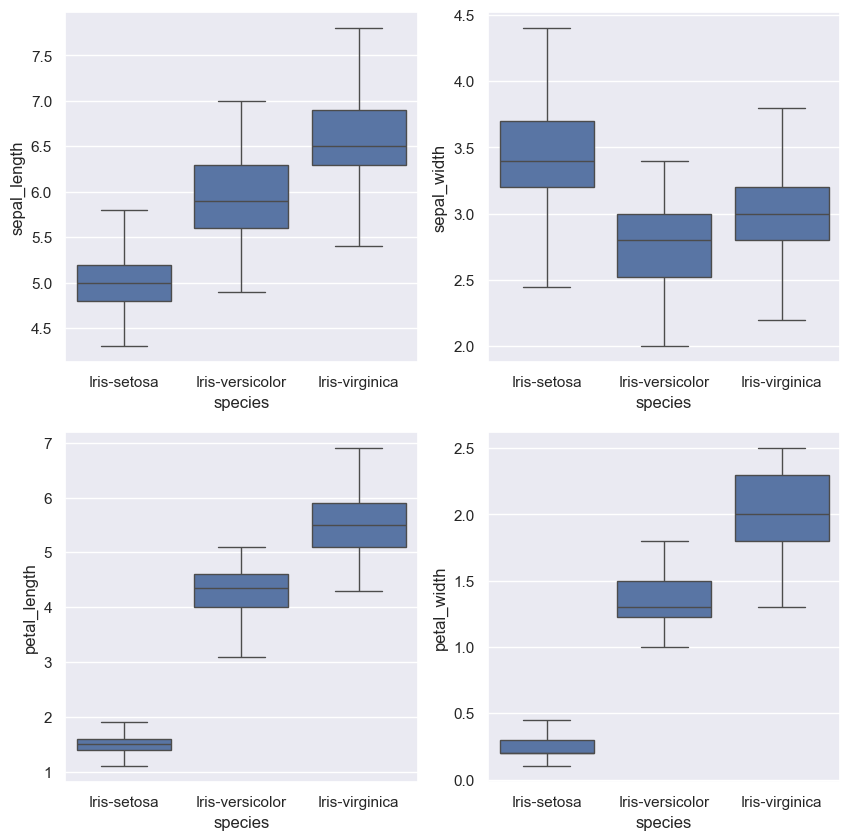

In [18]:
sns.set(rc={"figure.figsize":(10, 10)});
fig, axes = plt.subplots(2, 2);
sns.boxplot(data=iris_df, x='species', y='sepal_length', ax=axes[0,0]);
sns.boxplot(data=iris_df, x='species', y='sepal_width', ax=axes[0,1]);
sns.boxplot(data=iris_df, x='species', y='petal_length', ax=axes[1,0]);
sns.boxplot(data=iris_df, x='species', y='petal_width', ax=axes[1,1]);

## Save the cleaned data

In [19]:
iris_df.to_csv('data/iris_clean.csv', index = False)